<a href="https://colab.research.google.com/github/JP109/ML-Basics/blob/main/Supervised%20Learning%20Algorithms/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Univariate Linear Regression: Only accepts 1D array as input for X
1. np.polyfit()
2. scipy.stats.lineregress
3. scipy.optimize.curve.fit

Multivariate Linear Regression: Only accepts 2D array as input for X
1. sklearn.linear_model.LinearRegression


### **Import libraries**

In [19]:
from scipy import linspace, polyval, polyfit, sqrt, stats, randn, optimize
import statsmodels.api as sm
import matplotlib.pyplot as plt
import time
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
%matplotlib inline

### **Generate random data and plot**

In [20]:
students = {'hours': [29, 9, 10, 38, 16, 26, 50, 10, 30, 33, 43, 2, 39, 15, 44, 29, 41, 15, 24, 50],
            'test_results': [65, 7, 8, 76, 23, 56, 100, 3, 74, 48, 73, 0, 62, 37, 74, 40, 90, 42, 58, 100]}

student_data = pd.DataFrame(data=students)

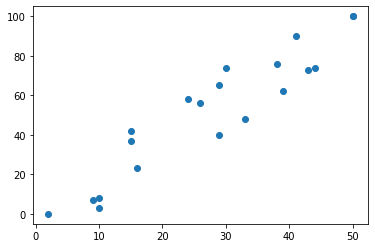

In [21]:
x = student_data.hours
y = student_data.test_results

plt.scatter(x,y)

## **Univariate Linear Regression**

### **1. np.polyfit**

Reference: https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

In [22]:
# Uses Ordinary Least Squares
model = np.polyfit(x,y,1)
print('m={:.2f}'.format(model[0]) + '  c={:.2f}'.format(model[1]))

m=2.01  c=-3.91


In [23]:
predict = np.poly1d(model)
predict(20)

36.38773723347843

### **2. stats.linregress**

In [24]:
model = stats.linregress(x,y)
model

LinregressResult(slope=2.014674871440727, intercept=-3.9057601953361, rvalue=0.9368820730704813, pvalue=1.1992631534960475e-09, stderr=0.17721959553200506)

### **3. Optimize.curve_fit**

Reference: https://machinelearningmastery.com/curve-fitting-with-python/
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

In [25]:
def objective(x, a, b):
	return a * x + b

In [26]:
model,_ = optimize.curve_fit(objective,x,y)
model

array([ 2.01467487, -3.9057602 ])

In [27]:
predict = np.poly1d(model)
predict(20)

36.387737233512006

## **Multivariate Linear Regression**

### **1. sklearn.linear_model.LinearRegression**

In [28]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
y = np.dot(X, np.array([1, 2])) + 3
reg = LinearRegression().fit(X, y)
print('Score:{}'.format(reg.score(X, y)))
print('Coefficients:{}'.format(reg.coef_))
print('Intercept:{}'.format(reg.intercept_))
print('Prediction:{}'.format(reg.predict(np.array([[3, 5]]))))

Score:1.0
Coefficients:[1. 2.]
Intercept:3.0000000000000018
Prediction:[16.]
